In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u

from scanning import camera, coordinates, visualization, optimization
import importlib

import io
from line_profiler import LineProfiler

In [67]:
importlib.reload(optimization)

<module 'scanning.optimization' from '/home/kristinchengwu/HAA/mapping/scanning/optimization.py'>

In [87]:
importlib.reload(visualization)

<module 'scanning.visualization' from '/home/kristinchengwu/HAA/mapping/scanning/visualization.py'>

In [69]:
prime_cam = camera.PrimeCam()
prime_cam.add_module('Mod280', 'c', mod_rot=0)

sky_pattern = coordinates.Pong(
    num_term=4, 
    width=2, height=2, spacing='400 arcsec', 
    velocity=1/2, sample_interval=1/40,
)

telescope_pattern = coordinates.TelescopePattern(
    sky_pattern, instrument=prime_cam, start_ra=0, start_dec=0, start_hrang=0
)

sim = optimization.Simulation(telescope_pattern, 'Mod280')

Running simulation...
...Done!


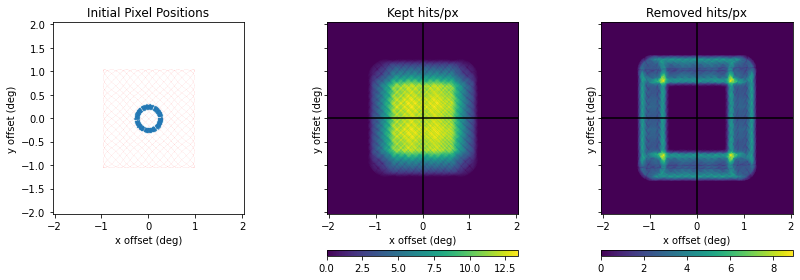

In [3]:
sim.set_conditions(max_acc=0.5, det_radius_range=[0.2*u.deg, 0.3*u.deg])
visualization.hitmap(sim, kept_hits=True, removed_hits=True)

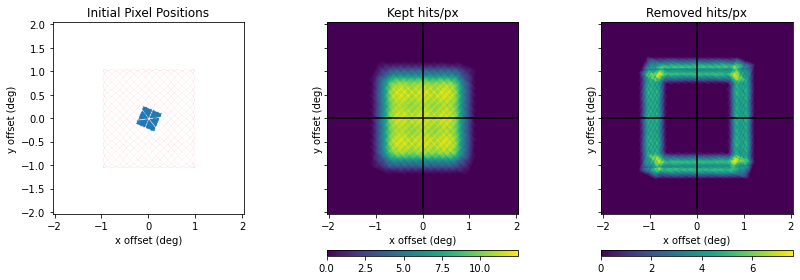

In [4]:
sim.set_conditions(max_acc=0.5, det_lim=[(-0.2, 0.2), (-0.2, 0.2)])
visualization.hitmap(sim, kept_hits=True, removed_hits=True)

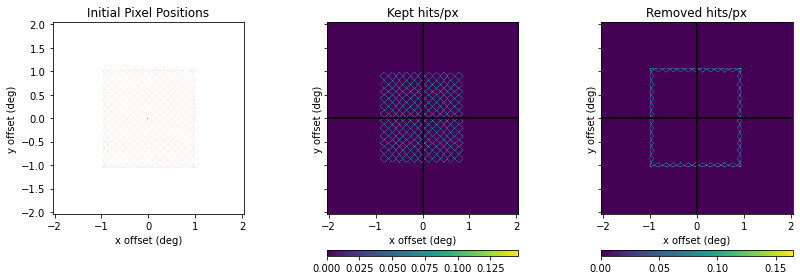

In [5]:
sim.set_conditions(max_acc=0.5, det_list=[(0, 0)])
visualization.hitmap(sim, kept_hits=True, removed_hits=True)

In [12]:
sim.sky_hist()

,-735.0,-734.0,-733.0,-732.0,-731.0,-730.0,-729.0,-728.0,-727.0,-726.0,...,725.0,726.0,727.0,728.0,729.0,730.0,731.0,732.0,733.0,734.0
-735.0,-5.858130e-15,-4.443442e-15,-3.154832e-15,-2.167999e-15,-9.273036e-15,4.442203e-15,-1.865404e-15,2.309745e-15,-5.811258e-15,-1.391457e-15,...,-9.181527e-17,2.921919e-15,-1.843341e-15,2.042214e-15,-6.994802e-15,-7.753304e-15,4.219296e-15,3.529846e-15,-5.715038e-15,9.196995e-15
-734.0,-5.813015e-15,-4.373710e-15,-3.061974e-15,-2.080178e-15,-9.218972e-15,4.521520e-15,-1.789626e-15,2.398839e-15,-5.703992e-15,-1.314505e-15,...,4.912509e-17,3.090153e-15,-1.654062e-15,2.186191e-15,-6.849019e-15,-7.620039e-15,4.352048e-15,3.597170e-15,-5.641683e-15,9.230524e-15
-733.0,-6.012350e-15,-4.512677e-15,-3.135649e-15,-2.135928e-15,-9.315512e-15,4.408927e-15,-1.958687e-15,2.156845e-15,-5.982786e-15,-1.616862e-15,...,-1.360551e-16,2.950299e-15,-1.753497e-15,2.080904e-15,-6.926130e-15,-7.685665e-15,4.298129e-15,3.506331e-15,-5.743327e-15,9.086090e-15
-732.0,-6.529847e-15,-5.033388e-15,-3.634719e-15,-2.597712e-15,-9.745472e-15,4.050749e-15,-2.266808e-15,1.868037e-15,-6.214512e-15,-1.806039e-15,...,-5.728577e-16,2.505057e-15,-2.195118e-15,1.630483e-15,-7.328794e-15,-8.038188e-15,4.014649e-15,3.254333e-15,-5.947487e-15,8.895594e-15
-731.0,-6.533810e-15,-5.013118e-15,-3.637257e-15,-2.665439e-15,-9.906689e-15,3.848881e-15,-2.483414e-15,1.610934e-15,-6.487138e-15,-2.123808e-15,...,-5.969582e-16,2.404701e-15,-2.355241e-15,1.434049e-15,-7.512898e-15,-8.219041e-15,3.833740e-15,3.008436e-15,-6.220653e-15,8.600028e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730.0,-3.026290e-15,-1.781638e-15,-2.766745e-16,4.770345e-16,-6.543448e-15,6.871880e-15,7.339943e-16,4.933958e-15,-3.141044e-15,1.240181e-15,...,2.671326e-15,5.307093e-15,9.323642e-16,4.749173e-15,-4.565038e-15,-4.975316e-15,6.857317e-15,6.368001e-15,-3.705839e-15,1.176734e-14
731.0,-3.846003e-15,-2.576613e-15,-1.018548e-15,-2.285313e-16,-7.222897e-15,6.204573e-15,4.300244e-17,4.238110e-15,-3.895932e-15,4.377242e-16,...,1.921113e-15,4.556526e-15,1.417378e-16,3.989965e-15,-5.330870e-15,-5.728171e-15,6.120510e-15,5.664312e-15,-4.415792e-15,1.100834e-14
732.0,-4.827275e-15,-3.593775e-15,-2.047817e-15,-1.298971e-15,-8.355305e-15,5.028473e-15,-1.159994e-15,3.067135e-15,-5.019606e-15,-6.296585e-16,...,9.022934e-16,3.618068e-15,-8.152738e-16,3.026189e-15,-6.338905e-15,-6.740201e-15,5.080534e-15,4.631026e-15,-5.444900e-15,1.000465e-14
733.0,-5.981745e-15,-4.713238e-15,-3.089359e-15,-2.267317e-15,-9.295835e-15,4.113535e-15,-2.093060e-15,2.128719e-15,-5.974691e-15,-1.583848e-15,...,-3.952928e-16,2.358723e-15,-2.059776e-15,1.862749e-15,-7.432737e-15,-7.771834e-15,4.057922e-15,3.626503e-15,-6.438003e-15,9.043727e-15


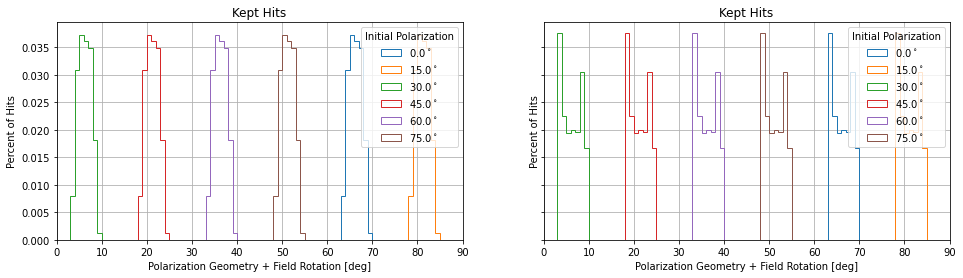

In [59]:
sim.set_conditions(max_acc=0.5)
visualization.polarization_histogram(sim, kept_hits=True, removed_hits=True)

In [70]:
sky_pattern2 = coordinates.Pong(
    num_term=4, 
    width=2, height=2, spacing='400 arcsec', 
    velocity=1/2, sample_interval=1, num_repeat=20
)

telescope_pattern2 = coordinates.TelescopePattern(
    sky_pattern2, instrument=prime_cam, start_ra=0, start_dec=0, start_hrang=0
)

sim2 = optimization.Simulation(telescope_pattern2, 'Mod280')

Running simulation...
...Done!


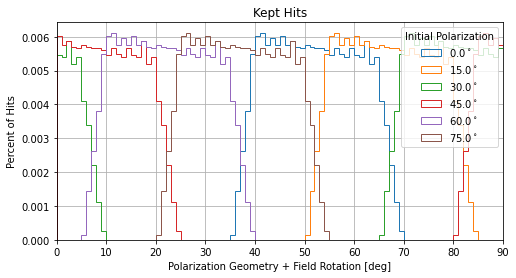

In [91]:
sim2.reset_conditions()
visualization.polarization_histogram(sim2, kept_hits=True, stacked=False)

In [50]:
p, count = sim.pol_hist()
print(count)
p

[864 864 864 864 864 864]


,0.0,15.0,30.0,45.0,60.0,75.0
0,67.014361,82.014361,7.014361,22.014361,37.014361,52.014361
1,67.025167,82.025167,7.025167,22.025167,37.025167,52.025167
2,67.035970,82.035970,7.035970,22.035970,37.035970,52.035970
3,67.046782,82.046782,7.046782,22.046782,37.046782,52.046782
4,67.057615,82.057615,7.057615,22.057615,37.057615,52.057615
...,...,...,...,...,...,...
6467,65.364145,80.364145,5.364145,20.364145,35.364145,50.364145
6468,65.375842,80.375842,5.375842,20.375842,35.375842,50.375842
6469,65.387483,80.387483,5.387483,20.387483,35.387483,50.387483
6470,65.399082,80.399082,5.399082,20.399082,35.399082,50.399082


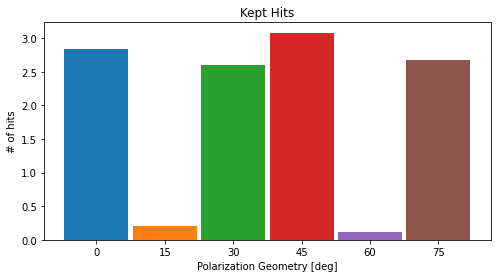

In [89]:
sim.set_conditions(max_acc=0.5)
visualization.pxan_polarization(sim, kept_hits=True, pxan_lim=[(-3450, -3400), (-3450, -3400)])

In [82]:
sim.det_hist(pxan_lim=[(-3450, -3400), (-3450, -3400)])

0       0.04
1       0.04
2       0.00
3       0.00
4       0.00
        ... 
5179    0.00
5180    0.00
5181    0.00
5182    0.00
5183    0.00
Length: 5184, dtype: float64

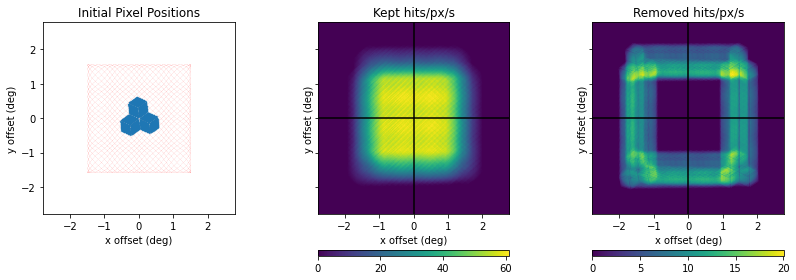

In [15]:
lp = LineProfiler()
lp.add_function(sim.sky_hist)
lp.add_function(sim._filter_coord)
lp.add_function(sim.detector_filter)
lp.add_function(sim.timestamp_filter)

lp_wrapper = lp(visualization.hitmap)
lp_wrapper(sim, kept_hits=True, removed_hits=True)

lp.print_stats(output_unit=1)

In [7]:
s = optimization.SimulationChunked(telescope_pattern, 'Mod280', max_acc=0.5)

Running simulation for kept hits...
...0/122441 completed...
...15432/122441 completed...
...30864/122441 completed...
...46296/122441 completed...
...61728/122441 completed...
...77160/122441 completed...
...92592/122441 completed...
...108024/122441 completed...
Running simulation for removed hits...
...0/26893 completed...
...15432/26893 completed...


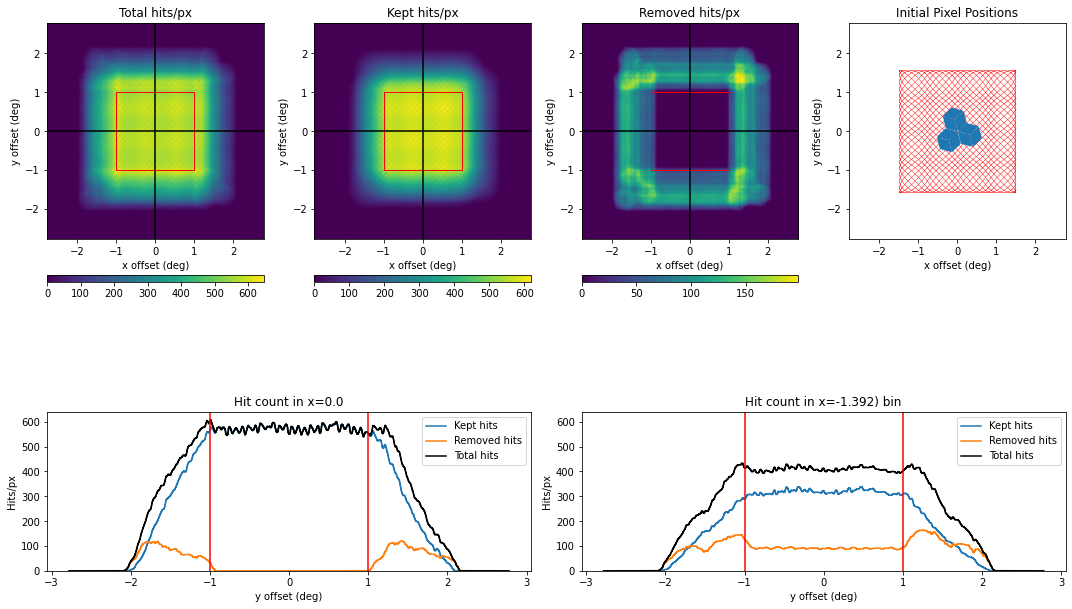

In [8]:
visualization.hm(s, convolve=True)

In [2]:
# Make a TelescopePattern
prime_cam = camera.PrimeCam()
prime_cam.add_module('Mod280', 'i1', mod_rot=0)

# Make a SkyPattern
#daisy_param = {"velocity": 0.3333333333333333, "start_acc": 0.2, "R0": 0.47, "Rt": 0.2222222222222222, "Ra": 0.16666666666666666, "T": 30, "sample_interval": 0.0025, "y_offset": 0.0}
pong_param = {'num_term': 4, 'width': 2, 'height': 2, 'spacing': '500 arcsec', 'velocity': 1/2, 'sample_interval': 1/50}
sky_pattern = coordinates.Pong(**pong_param)

telescope_pattern = coordinates.TelescopePattern(
    sky_pattern, instrument=prime_cam, module='Mod280', 
    start_ra=0, start_dec=0, start_hrang=0
)

In [19]:
importlib.reload(optimization)

<module 'scanning.optimization' from '/home/kristinchengwu/HAA/mapping/scanning/optimization.py'>

In [16]:
importlib.reload(visualization)

<module 'scanning.visualization' from '/home/kristinchengwu/HAA/mapping/scanning/visualization.py'>

In [20]:
s = optimization.Simulation(telescope_pattern, 'Mod280', mem_lim=8*10**7)

Running simulation...
...Done!


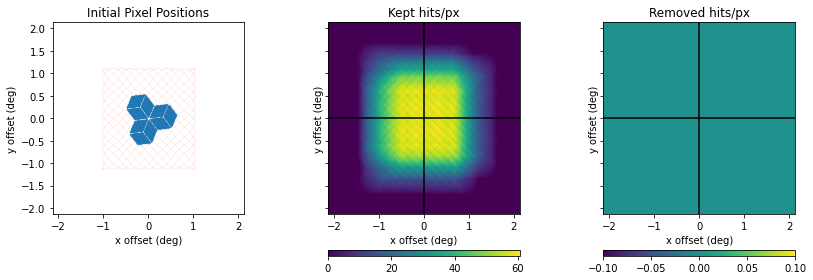

In [21]:
visualization.hitmap(s, kept_hits=True, rem_hits=True)

In [5]:
s.det_hist([(0, 0)])

(array([0, 0, 0, ..., 0, 0, 0]), RangeIndex(start=0, stop=5184, step=1), 1)

1.8769842490483206
2.1233045007200473
1
2


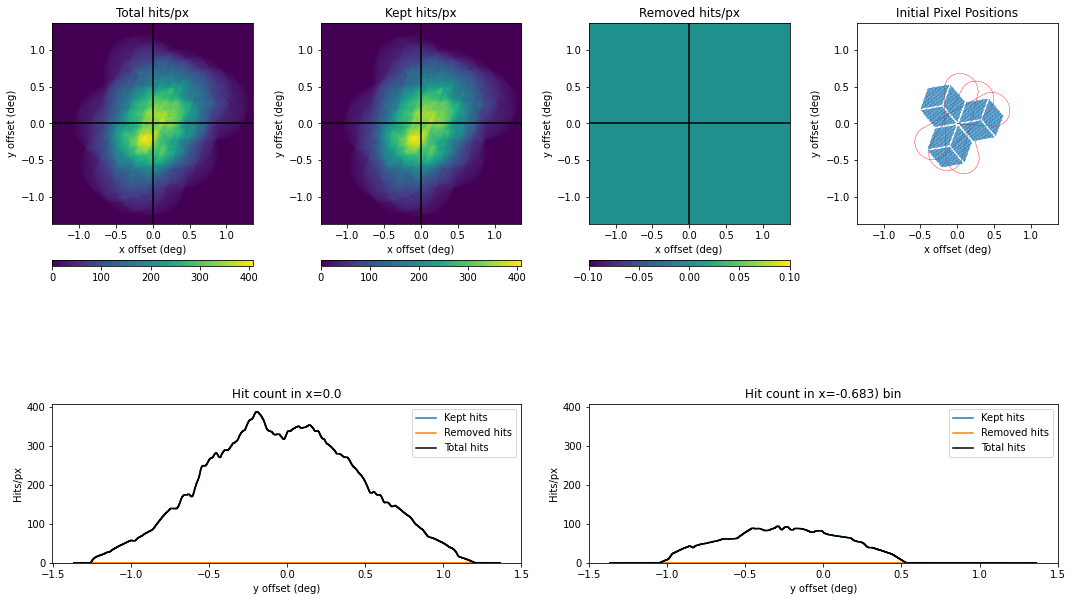

In [28]:
visualization.hitmap(s, convolve=True)

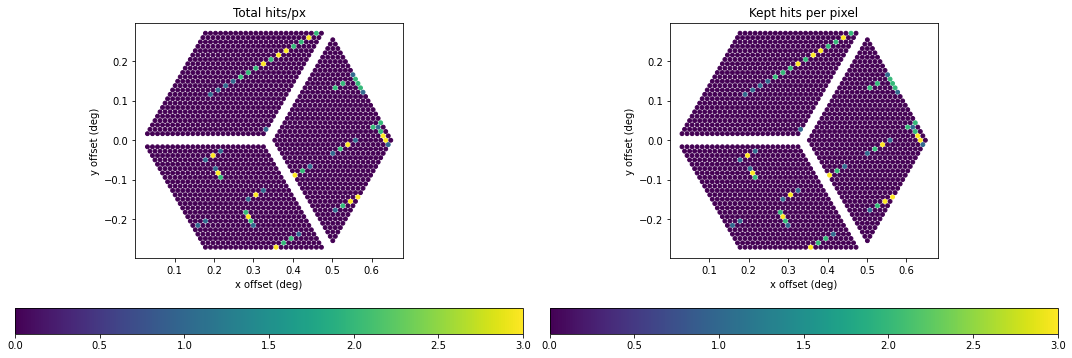

In [5]:
visualization.pxan_det(s, norm_pxan=True)